<a href="https://colab.research.google.com/github/HananeIouiri/Multiple-Linear-Regression/blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [271]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## 1. Dataset

In [272]:
dataset=pd.read_csv('Advertising.csv')

In [273]:
dataset.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [274]:
xt=dataset.TV
xr=dataset.Radio
xn=dataset  .Newspaper
y=dataset .Sales


In [275]:
x=dataset[['TV','Radio','Newspaper']]
y=dataset['Sales']


In [276]:
x.shape

(200, 3)

In [277]:
y.shape

(200,)

In [278]:
y=dataset.Sales.values.reshape(-1,1)

In [279]:
X=np.hstack((np.ones(len(x)).reshape(-1,1),x))

In [280]:
X.shape

(200, 4)

In [281]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [282]:
X_train=np.hstack((np.ones(len(x_train)).reshape(-1,1),x_train))
X_test=np.hstack((np.ones(len(x_test)).reshape(-1,1),x_test))

In [283]:
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)

(160, 4)
(40, 4)
(40, 1)
(160, 1)


In [284]:
np.random.seed(0)
theta=np.random.randn(4).reshape(-1,1)
print('Theta',theta)

Theta [[1.76405235]
 [0.40015721]
 [0.97873798]
 [2.2408932 ]]


## 2. Modèle Linéaire


In [285]:

def model(X,theta):
  return X.dot(theta)

## 3. Fonction coût : Erreur Quadratique Moyenne

In [286]:
def cost_function(X,y,theta):
  m=len(y)
  return 1/(2*m)*np.sum((model(X,theta)-y)**2)

In [287]:
cost_function(X_train,y_train,theta)

np.float64(11052.071417485904)

In [288]:
def grad(X,y,theta):
  m=len(y)
  return 1/m*X.T.dot(model(X,theta)-y)


In [289]:
def gradient_descent(X, Y, theta, learning_rate, n_iterations):

    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele

    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, Y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, Y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]

    return theta, cost_history

## 4. Phase d'entrainement

In [290]:
n_iterations=1000000
learning_rate=0.00002

theta_final,cost_history=gradient_descent(X_train,y_train,theta,learning_rate,n_iterations)

In [291]:
theta_final

array([[4.52856113],
       [0.05503115],
       [0.10278943],
       [0.00565052]])

In [292]:
cost_history

array([3.18207025e+03, 1.96694552e+03, 1.74239043e+03, ...,
       1.34046031e+00, 1.34046029e+00, 1.34046028e+00])

# 5. Courbe d'apprentissage

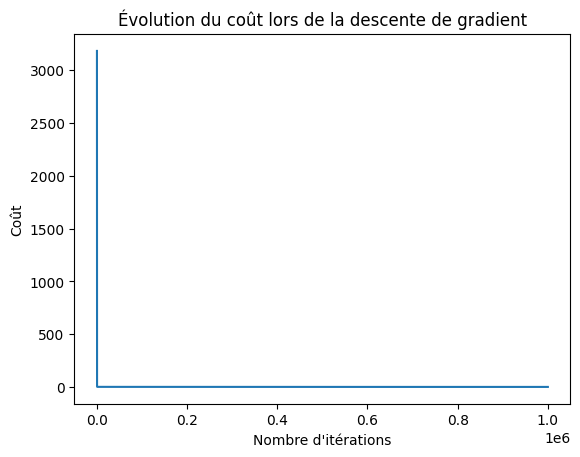

In [293]:
# Courbe d'apprentissage
plt.plot(range(n_iterations), cost_history)
plt.xlabel("Nombre d'itérations")
plt.ylabel("Coût")
plt.title("Évolution du coût lors de la descente de gradient")
plt.show()

In [294]:
y_pred= model(X_test, theta_final)

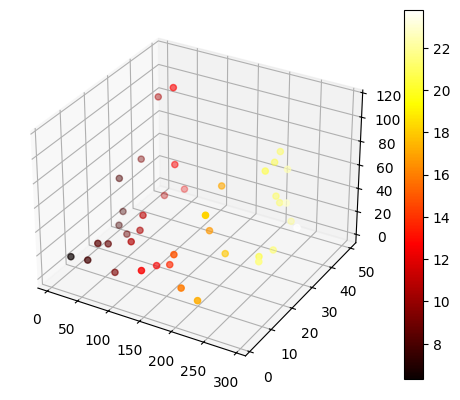

In [295]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt1
import numpy as np

fig = plt1.figure()
ax = fig.add_subplot(111, projection='3d')

x = x_test['TV']
y = x_test['Radio']
z = x_test['Newspaper']
c = y_pred

img = ax.scatter(x, y, z, c=c, cmap=plt1.hot())
fig.colorbar(img)
plt1.show()

# 6. Evaluation du modèle - Coefficient de détermination

In [296]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [297]:
coef_determination(y_test,y_pred) # predictions=model(X_test,theta_final)

np.float64(0.9062938775036765)